In [3]:
#导入需要的API
import numpy
from keras import backend as K
from keras.utils import np_utils
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers.core import Activation

Using TensorFlow backend.


In [4]:
#直接输出图像
%matplotlib inline

In [5]:
K.set_image_data_format('channels_last')
#初始化随机数生成器为恒定的种子值，以使结果具有可重复性
numpy.random.seed(0)

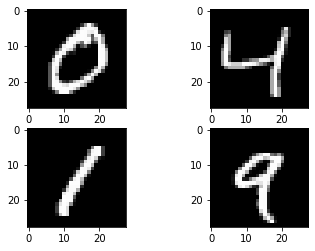

In [6]:
# 加载MNIST数据集，数据集以mnist.pkl.gz文件形式自动下载到用户的目录中
(XTrain, yTrain), (XTest, yTest) = mnist.load_data()
# 将图片设为灰度图像
plt.subplot(221)
plt.imshow(XTrain[1], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(XTrain[2], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(XTrain[3], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(XTrain[4], cmap=plt.get_cmap('gray'))
# 运行以上代码得到示例图形
plt.show()

In [7]:
# 导入 sequential，对Keras序贯层进行堆叠处理，以便每个层的输出传输到下一层的过程中不需定义其他数据
model = Sequential()

In [8]:
# 为了提高算法的效率和收敛性，基于最大像素225对数据进行归一化处理，将所有像素除以225以将输入变为0~1之间的数值
XTrain = XTrain / 255
XTest = XTest / 255

In [9]:
# 根据数据选择合适的算法并得到所需的准确率指标。
#如果数据与类别的分布比较均衡，则简单的使用准确率
#如果数据与类别分布不均衡，那么将无法使用准确率，因为其结果会产生误导，这时候就是用另一种指标
print("Number of training examples = %i" % XTrain.shape[0])
print("Number of classes = %i" % len(numpy.unique(yTrain)))
print("Dimension of images = {:d} x {:d}  ".format(XTrain[1].shape[0], XTrain[1].shape[1]))
unique, count = numpy.unique(yTrain, return_counts=True)
print("The number of occurrences of each class in the dataset = %s " % dict(zip(unique, count)), "\n")

Number of training examples = 60000
Number of classes = 10
Dimension of images = 28 x 28  
The number of occurrences of each class in the dataset = {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}  



In [10]:
#以独热编码的形式输出结果，因此。从0~9会有10个类，即每个数字为一个类
XTrain = XTrain.reshape(XTrain.shape[0], 28, 28, 1).astype('float32')
XTest = XTest.reshape(XTest.shape[0], 28, 28, 1).astype('float32')
yTrain = np_utils.to_categorical(yTrain)
yTest = np_utils.to_categorical(yTest)

In [11]:
# 用最简单的架构实现CNN的第一层。
#对于序贯模型，对层进行堆叠，并在第一层，也就是卷积层Conv2D（）中指定图像的输入维度、特征映射数量、输入形状和激活函数（rule)，然后添加内核维度为2X2的最大池化层：
model.add(Conv2D(40, kernel_size=5, padding="same", input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(50, kernel_size=5, padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [12]:
#添加一个平展层Flatten()，用来接收CNN的输出并将其平展,将平展后的数据作为稠密层的输入，进而传递到输出层
model.add(Flatten())
model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(10))
#在输出层使用softmax输出多类分类的预测概率向量
model.add(Activation("softmax"))

In [13]:
#编译模型
#使用categorical_crossentropy作为该模型的成本函数
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#使用fit()进行训练，拟合训练数据和类别，设置迭代次数32和批处理大小200
history=model.fit(XTrain, yTrain, epochs=32, batch_size=200, validation_split=0.2)
#对模型进行评估以确保不会出现数据过拟合的情况
scores = model.evaluate(XTest, yTest, verbose=10)
print(scores)


Train on 48000 samples, validate on 12000 samples
Epoch 1/32
48000/48000 [==============================] - 234s 5ms/step - loss: 0.2461 - accuracy: 0.9254 - val_loss: 0.0618 - val_accuracy: 0.9814
Epoch 2/32
48000/48000 [==============================] - 253s 5ms/step - loss: 0.0654 - accuracy: 0.9809 - val_loss: 0.0510 - val_accuracy: 0.9841
Epoch 3/32
48000/48000 [==============================] - 236s 5ms/step - loss: 0.0447 - accuracy: 0.9860 - val_loss: 0.0404 - val_accuracy: 0.9883
Epoch 4/32
48000/48000 [==============================] - 250s 5ms/step - loss: 0.0351 - accuracy: 0.9889 - val_loss: 0.0357 - val_accuracy: 0.9902
Epoch 5/32
48000/48000 [==============================] - 228s 5ms/step - loss: 0.0262 - accuracy: 0.9917 - val_loss: 0.0348 - val_accuracy: 0.9903
Epoch 6/32
48000/48000 [==============================] - 215s 4ms/step - loss: 0.0221 - accuracy: 0.9933 - val_loss: 0.0350 - val_accuracy: 0.9901
Epoch 7/32
48000/48000 [==============================] - 222

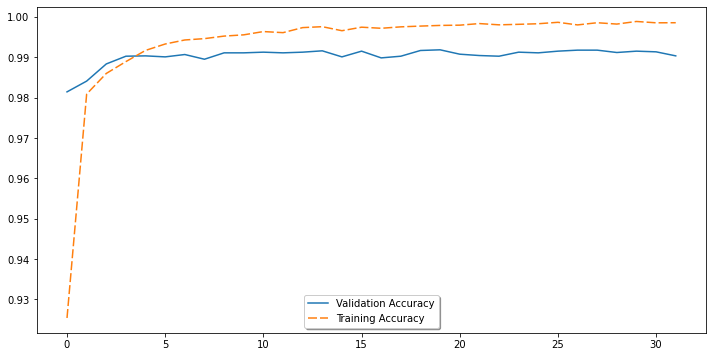

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,6))
gen = ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
fr = ax.plot(history.history['accuracy'],dashes=[6, 2], label='Training Accuracy')
legend = ax.legend(loc='lower center', shadow=True)
plt.show()